# Day 14

## Part 1

You reach the place where all of the mirrors were pointing: a massive parabolic reflector dish attached to the side of another large mountain.

The dish is made up of many small mirrors, but while the mirrors themselves are roughly in the shape of a parabolic reflector dish, each individual mirror seems to be pointing in slightly the wrong direction. If the dish is meant to focus light, all it's doing right now is sending it in a vague direction.

This system must be what provides the energy for the lava! If you focus the reflector dish, maybe you can go where it's pointing and use the light to fix the lava production.

Upon closer inspection, the individual mirrors each appear to be connected via an elaborate system of ropes and pulleys to a large metal platform below the dish. The platform is covered in large rocks of various shapes. Depending on their position, the weight of the rocks deforms the platform, and the shape of the platform controls which ropes move and ultimately the focus of the dish.

In short: if you move the rocks, you can focus the dish. The platform even has a control panel on the side that lets you tilt it in one of four directions! The rounded rocks (O) will roll when the platform is tilted, while the cube-shaped rocks (#) will stay in place. You note the positions of all of the empty spaces (.) and rocks (your puzzle input). For example:

```
O....#....
O.OO#....#
.....##...
OO.#O....O
.O.....O#.
O.#..O.#.#
..O..#O..O
.......O..
#....###..
#OO..#....
```
Start by tilting the lever so all of the rocks will slide north as far as they will go:

```
OOOO.#.O..
OO..#....#
OO..O##..O
O..#.OO...
........#.
..#....#.#
..O..#.O.O
..O.......
#....###..
#....#....
```
You notice that the support beams along the north side of the platform are damaged; to ensure the platform doesn't collapse, you should calculate the total load on the north support beams.

The amount of load caused by a single rounded rock (O) is equal to the number of rows from the rock to the south edge of the platform, including the row the rock is on. (Cube-shaped rocks (#) don't contribute to load.) So, the amount of load caused by each rock in each row is as follows:

```
OOOO.#.O.. 10
OO..#....#  9
OO..O##..O  8
O..#.OO...  7
........#.  6
..#....#.#  5
..O..#.O.O  4
..O.......  3
#....###..  2
#....#....  1
```
The total load is the sum of the load caused by all of the rounded rocks. In this example, the total load is 136.

Tilt the platform so that the rounded rocks all roll north. Afterward, what is the total load on the north support beams?

In [1]:
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#333", "black", "red"]
cmap = mcolors.ListedColormap(colors)


def plot_heatmap(df):
    fig, ax = plt.subplots(figsize=(1, 1))

    sns.heatmap(
        df,
        ax=ax,
        cmap=cmap,
        cbar=False,
        linewidths=0.5,
        linecolor="black",
    )
    ax.set_title("")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    fig.set_facecolor("#222")
    plt.tight_layout()
    plt.show()


def plot_pre_post_heatmap(df_pre, df_post):
    # Set up the matplotlib figure
    fig, axes = plt.subplots(
        nrows=1, ncols=3, figsize=(4, 2), gridspec_kw={"width_ratios": [1, 0.2, 1]}
    )

    # Plotting the pre-operation heatmap
    sns.heatmap(
        df_pre,
        ax=axes[0],
        cmap=cmap,
        cbar=False,
        linewidths=0.5,
        linecolor="black",
    )
    axes[0].set_title("")
    axes[0].set_xlabel("")
    axes[0].set_ylabel("")
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].spines["top"].set_visible(False)
    axes[0].spines["right"].set_visible(False)
    axes[0].spines["bottom"].set_visible(False)
    axes[0].spines["left"].set_visible(False)

    # Plotting an arrow
    axes[1].annotate(
        "",
        xy=(1, 0.5),
        xytext=(-0.25, 0.5),
        arrowprops=dict(arrowstyle="->", lw=2),
    )
    axes[1].axis("off")

    # Plotting the post-operation heatmap
    sns.heatmap(
        df_post,
        ax=axes[2],
        cmap=cmap,
        cbar=False,
        linewidths=0.5,
        linecolor="black",
    )

    axes[2].set_title("")
    axes[2].set_xlabel("")
    axes[2].set_ylabel("")
    axes[2].set_xticks([])
    axes[2].set_yticks([])
    axes[2].spines["top"].set_visible(False)
    axes[2].spines["right"].set_visible(False)
    axes[2].spines["bottom"].set_visible(False)
    axes[2].spines["left"].set_visible(False)

    fig.set_facecolor("#222")
    plt.tight_layout()
    plt.show()


def move_rocks(df: pd.DataFrame, plot=False) -> pd.DataFrame:
    new_df = df.copy()

    for col in new_df.columns:
        column_values = new_df[col].values

        # find groups between rock_positions
        rock_groups = str("".join([str(x) for x in column_values])).split("1")
        # sort each group in reverse order so the circle rocks are at the top
        new_value_groups = []
        for group in rock_groups:
            new_values = "".join(sorted(group, reverse=True))
            new_value_groups.append(new_values)
        # join them back together with the cube rocks
        new_column_values = "1".join(new_value_groups)

        new_row_data = [int(row) for row in new_column_values]
        new_df[col] = new_row_data

    if plot:
        plot_pre_post_heatmap(df, new_df)
    return new_df


def calculate_beam_load(df) -> int:
    # reversed 1-indexed list of the number
    new_index = list(reversed(range(1, len(df) + 1)))

    weight = 0
    for i, scale in enumerate(new_index):
        # 10, 9, 8...etc
        row_weight = len([v for v in df.iloc[i].values if v == 2])
        weight += row_weight * scale
    return weight


def str_to_df(input_str: str) -> pd.DataFrame:
    df = pd.DataFrame([list(row) for row in input_str.splitlines()])
    # convert `O` to 2, `#` to 1 and `.` to 0
    df = df.replace({"O": 2, "#": 1, ".": 0})
    return df


test_input = """O....#....
O.OO#....#
.....##...
OO.#O....O
.O.....O#.
O.#..O.#.#
..O..#O..O
.......O..
#....###..
#OO..#...."""

test_df = str_to_df(test_input)
test_df = move_rocks(test_df)

test_score = calculate_beam_load(test_df)
test_score

136

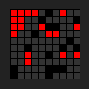

In [2]:
plot_heatmap(
    str_to_df(
        """OOOO.#.O..
OO..#....#
OO..O##..O
O..#.OO...
........#.
..#....#.#
..O..#.O.O
..O.......
#....###..
#....#...."""
    )
)

In [3]:
input_str = open("../inputs/14.txt").read()
df = str_to_df(input_str)
df = move_rocks(df)
score = calculate_beam_load(df)
score

110274

## Part 2

The parabolic reflector dish deforms, but not in a way that focuses the beam. To do that, you'll need to move the rocks to the edges of the platform. Fortunately, a button on the side of the control panel labeled "spin cycle" attempts to do just that!

Each cycle tilts the platform four times so that the rounded rocks roll north, then west, then south, then east. After each tilt, the rounded rocks roll as far as they can before the platform tilts in the next direction. After one cycle, the platform will have finished rolling the rounded rocks in those four directions in that order.

Here's what happens in the example above after each of the first few cycles:

After 1 cycle:
```
.....#....
....#...O#
...OO##...
.OO#......
.....OOO#.
.O#...O#.#
....O#....
......OOOO
#...O###..
#..OO#....
```
After 2 cycles:
```
.....#....
....#...O#
.....##...
..O#......
.....OOO#.
.O#...O#.#
....O#...O
.......OOO
#..OO###..
#.OOO#...O
```
After 3 cycles:
```
.....#....
....#...O#
.....##...
..O#......
.....OOO#.
.O#...O#.#
....O#...O
.......OOO
#...O###.O
#.OOO#...O
```
This process should work if you leave it running long enough, but you're still worried about the north support beams. To make sure they'll survive for a while, you need to calculate the total load on the north support beams after 1000000000 cycles.

In the above example, after 1000000000 cycles, the total load on the north support beams is 64.

Run the spin cycle for 1000000000 cycles. Afterward, what is the total load on the north support beams?

In [4]:
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr), print(np.rot90(arr, -1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[7 4 1]
 [8 5 2]
 [9 6 3]]


(None, None)

In [26]:
from tqdm.auto import tqdm
from collections import defaultdict

df = str_to_df(input_str)

# 1000000000
scores = defaultdict(int)
for cycle in tqdm(range(10000)):
    # rotate the df 90 counter-clockwise (N->W->S->E)
    df = pd.DataFrame(np.rot90(df.values, -1))
    df = move_rocks(df)
    score = calculate_beam_load(df)
    scores[score] += 1
score

100%|██████████| 10000/10000 [02:13<00:00, 74.79it/s]


98723

In [27]:
scores

defaultdict(int,
            {108890: 1,
             108945: 1,
             103897: 1,
             103805: 1,
             108637: 1,
             108754: 1,
             103755: 1,
             103860: 1,
             108700: 1,
             108753: 1,
             103575: 1,
             103841: 1,
             108856: 1,
             108702: 1,
             103296: 1,
             103821: 1,
             109036: 1,
             108715: 1,
             103061: 1,
             103812: 1,
             109222: 1,
             108767: 1,
             102792: 1,
             103667: 1,
             109533: 1,
             108944: 1,
             102424: 1,
             103477: 1,
             109935: 1,
             109115: 1,
             101968: 1,
             103314: 1,
             110402: 1,
             109259: 1,
             101594: 1,
             103118: 1,
             110771: 1,
             109406: 1,
             101184: 1,
             102998: 2,
             111180: 1,

In [28]:
vals_in_cycle = [k for k, v in scores.items() if v < 2]
len(vals_in_cycle)
mod = 1_000_000_000 % len(vals_in_cycle)
mod, vals_in_cycle[mod - 1]

(400, 122205)